Task 3: Linear Regression - Housing Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

Importing and Preprocessing the Dataset

In [7]:
df = pd.read_csv("C:/Users/ADMIN/Downloads/Elevate Labs Tasks/Housing.csv")
# overview
print(f"\n OVERVIEW")
print(f"Dataset Shape: {df.shape}")
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")

#basic info
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
df.head()


 OVERVIEW
Dataset Shape: (545, 13)
Number of records: 545
Number of features: 13

Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

First 5 rows:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Data Exploration and Understanding

In [ ]:
# Missing values
print(f"\n MISSING VALUES CHECK")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("No missing values detected!")

# Statistics
print(f"\n STATISTICAL SUMMARY")
df.describe()


 MISSING VALUES CHECK
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
No missing values detected!

 STATISTICAL SUMMARY


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Categorical Variables Analysis


In [11]:
# Categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

print(f"\n CATEGORICAL VARIABLES ANALYSIS")
for col in categorical_cols:
    print(f"\n{col.upper()} Distribution:")
    print(df[col].value_counts())


 CATEGORICAL VARIABLES ANALYSIS

MAINROAD Distribution:
mainroad
yes    468
no      77
Name: count, dtype: int64

GUESTROOM Distribution:
guestroom
no     448
yes     97
Name: count, dtype: int64

BASEMENT Distribution:
basement
no     354
yes    191
Name: count, dtype: int64

HOTWATERHEATING Distribution:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

AIRCONDITIONING Distribution:
airconditioning
no     373
yes    172
Name: count, dtype: int64

PREFAREA Distribution:
prefarea
no     417
yes    128
Name: count, dtype: int64

FURNISHINGSTATUS Distribution:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


## Target Variable Analysis

In [12]:
# Analyze price:
print(f"\nTARGET VARIABLE ANALYSIS")
print(f"Mean Price: ₹{df['price'].mean():,.0f}")
print(f"Median Price: ₹{df['price'].median():,.0f}")
print(f"Price Range: ₹{df['price'].min():,.0f} - ₹{df['price'].max():,.0f}")
print(f"Price Skewness: {df['price'].skew():.3f}")


TARGET VARIABLE ANALYSIS
Mean Price: ₹4,766,729
Median Price: ₹4,340,000
Price Range: ₹1,750,000 - ₹13,300,000
Price Skewness: 1.212


# Data Preprocessing

In [15]:
# preprocessing
df_processed = df.copy()

# Encode categorical variables
print(f"\n DATA PREPROCESSING")

# Binary encoding
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
               'airconditioning', 'prefarea']

for col in binary_cols:
    df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})
    print(f"  {col}: yes=1, no=0")

# Ordinal encoding for furnishing
furnishing_map = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df_processed['furnishingstatus'] = df_processed['furnishingstatus'].map(furnishing_map)
print(f"  furnishingstatus: {furnishing_map}")


 DATA PREPROCESSING
  mainroad: yes=1, no=0
  guestroom: yes=1, no=0
  basement: yes=1, no=0
  hotwaterheating: yes=1, no=0
  airconditioning: yes=1, no=0
  prefarea: yes=1, no=0
  furnishingstatus: {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}


## Split Data into Train-Test Sets

In [17]:
# Features and target
X = df_processed.drop('price', axis=1)
y = df_processed['price']

print(f"\n FEATURE-TARGET SEPARATION")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Train-test split (80% training, 20% testing):
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\n TRAIN-TEST SPLIT")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")


 FEATURE-TARGET SEPARATION
Features (X) shape: (545, 12)
Target (y) shape: (545,)

 TRAIN-TEST SPLIT
Training set: 436 samples (80.0%)
Test set: 109 samples (20.0%)


# Fitting Linear Regression Model

In [19]:
# Train the Linear Reg. model
print(f"\n LINEAR REGRESSION MODEL TRAINING")
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)


# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



 LINEAR REGRESSION MODEL TRAINING


### Evaluate Model Using MAE, MSE, R²

In [20]:
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Mean Absolute Error
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{dataset_name} Set Performance:")
    print(f"  MAE (Mean Absolute Error): ₹{mae:,.0f}")
    print(f"  MSE (Mean Squared Error): ₹{mse:,.0f}")
    print(f"  RMSE (Root Mean Squared Error): ₹{rmse:,.0f}")
    print(f"  R² Score (Coefficient of Determination): {r2:.4f}")
    print(f"  MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
    print(f"  Model Accuracy: {100-mape:.2f}%")
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

# Evaluate model performance
print(f"\nMODEL PERFORMANCE EVALUATION")
print("=" * 50)

train_metrics = calculate_metrics(y_train, y_train_pred, "Training")
test_metrics = calculate_metrics(y_test, y_test_pred, "Test")

# Overfitting check
overfitting = train_metrics['R2'] - test_metrics['R2']
print(f"\nOverfitting Analysis:")
print(f"  R² difference (Train - Test): {overfitting:.4f}")
if overfitting < 0.05:
    print(" Good: Minimal overfitting")
elif overfitting < 0.1:
    print(" Moderate: Some overfitting present")
else:
    print("High: Significant overfitting detected")


MODEL PERFORMANCE EVALUATION

Training Set Performance:
  MAE (Mean Absolute Error): ₹718,147
  MSE (Mean Squared Error): ₹969,902,818,698
  RMSE (Root Mean Squared Error): ₹984,836
  R² Score (Coefficient of Determination): 0.6854
  MAPE (Mean Absolute Percentage Error): 15.93%
  Model Accuracy: 84.07%

Test Set Performance:
  MAE (Mean Absolute Error): ₹979,680
  MSE (Mean Squared Error): ₹1,771,751,116,594
  RMSE (Root Mean Squared Error): ₹1,331,071
  R² Score (Coefficient of Determination): 0.6495
  MAPE (Mean Absolute Percentage Error): 21.31%
  Model Accuracy: 78.69%

Overfitting Analysis:
  R² difference (Train - Test): 0.0360
 Good: Minimal overfitting


## Plot Regression Line and Interpret Coefficients


In [21]:
# Model analysis
print(f"\n MODEL INTERPRETATION")
print("=" * 40)

print(f"Model Equation:")
print(f"Price = {model.intercept_:,.0f} + ", end="")

# Display coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Coefficients (Impact on Price):")
for _, row in coefficients_df.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    if coef >= 0:
        print(f"  {feature:15s}: +₹{coef:>10,.0f} (increases price)")
    else:
        print(f"  {feature:15s}: -₹{abs(coef):>10,.0f} (decreases price)")

# Feature ranking
print(f"\n FEATURE IMPORTANCE RANKING:")
for i, (_, row) in enumerate(coefficients_df.iterrows(), 1):
    feature = row['Feature']
    abs_coef = row['Abs_Coefficient']
    print(f"  {i:2d}. {feature:15s}: ₹{abs_coef:,.0f}")


 MODEL INTERPRETATION
Model Equation:
Price = -127,711 + 
Feature Coefficients (Impact on Price):
  bathrooms      : +₹ 1,097,117 (increases price)
  airconditioning: +₹   785,551 (increases price)
  hotwaterheating: +₹   687,881 (increases price)
  prefarea       : +₹   629,902 (increases price)
  stories        : +₹   406,223 (increases price)
  basement       : +₹   393,160 (increases price)
  mainroad       : +₹   366,824 (increases price)
  guestroom      : +₹   233,147 (increases price)
  parking        : +₹   225,757 (increases price)
  furnishingstatus: +₹   210,397 (increases price)
  bedrooms       : +₹    78,574 (increases price)
  area           : +₹       236 (increases price)

 FEATURE IMPORTANCE RANKING:
   1. bathrooms      : ₹1,097,117
   2. airconditioning: ₹785,551
   3. hotwaterheating: ₹687,881
   4. prefarea       : ₹629,902
   5. stories        : ₹406,223
   6. basement       : ₹393,160
   7. mainroad       : ₹366,824
   8. guestroom      : ₹233,147
   9. parkin

# Visualization: Actual vs Predicted Prices

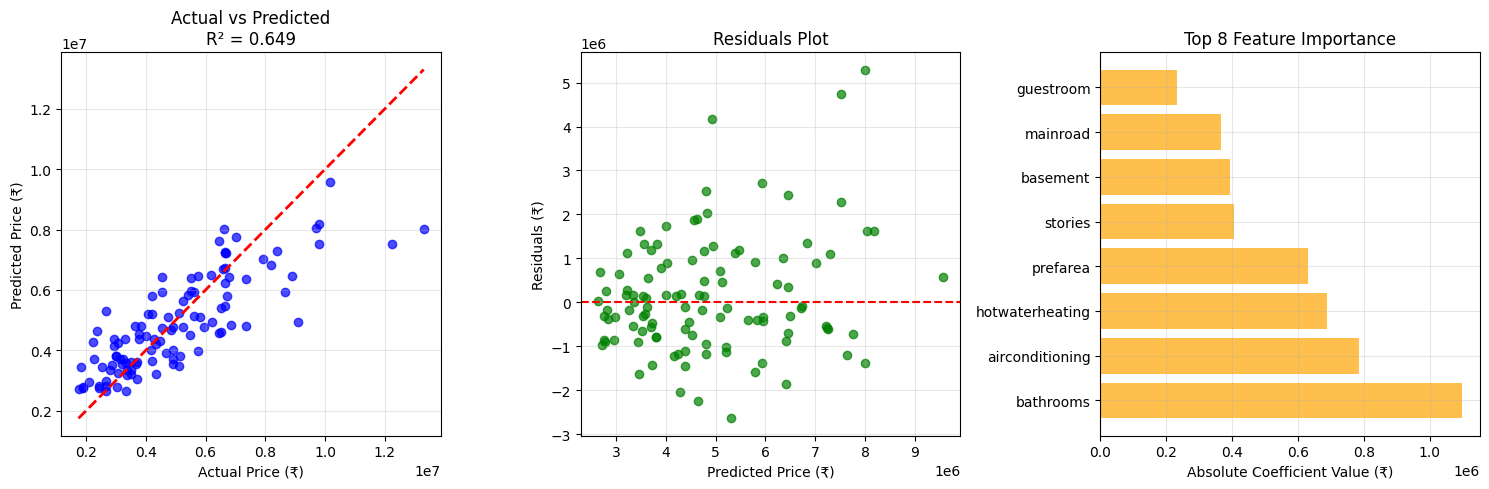

In [22]:
# Visualization for model performance
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted (Test Set)
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (₹)')
plt.ylabel('Predicted Price (₹)')
plt.title(f'Actual vs Predicted\nR² = {test_metrics["R2"]:.3f}')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
plt.subplot(1, 3, 2)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price (₹)')
plt.ylabel('Residuals (₹)')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

# Plot 3: Feature Importance
plt.subplot(1, 3, 3)
top_features = coefficients_df.head(8)
plt.barh(range(len(top_features)), top_features['Abs_Coefficient'], 
         color='orange', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Absolute Coefficient Value (₹)')
plt.title('Top 8 Feature Importance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Simple vs Multiple Regression Comparison

In [23]:
# Simple Linear Regression
print(f"\n SIMPLE vs MULTIPLE REGRESSION COMPARISON")
print("=" * 55)

X_simple = X[['area']]
model_simple = LinearRegression()
model_simple.fit(X_simple, y)
y_pred_simple = model_simple.predict(X_simple)

r2_simple = r2_score(y, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y, y_pred_simple))

print(f"Simple Linear Regression (Area only):")
print(f"  R² Score: {r2_simple:.4f}")
print(f"  RMSE: ₹{rmse_simple:,.0f}")
print(f"  Equation: Price = ₹{model_simple.intercept_:,.0f} + ₹{model_simple.coef_[0]:.0f} × Area")

print(f"\nComparison:")
print(f"  Multiple Regression R²: {test_metrics['R2']:.4f}")
print(f"  Improvement in R²: {(test_metrics['R2'] - r2_simple):.4f}")
print(f"  R² improvement: {((test_metrics['R2'] - r2_simple)/r2_simple)*100:.1f}%")


 SIMPLE vs MULTIPLE REGRESSION COMPARISON
Simple Linear Regression (Area only):
  R² Score: 0.2873
  RMSE: ₹1,577,613
  Equation: Price = ₹2,387,308 + ₹462 × Area

Comparison:
  Multiple Regression R²: 0.6495
  Improvement in R²: 0.3622
  R² improvement: 126.1%


# Sample Predictions

In [24]:
# Show sample predictions
print(f"\n SAMPLE PREDICTIONS")
print("=" * 40)

sample_size = min(10, len(y_test))
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
print(f"{'Actual Price':>12} {'Predicted':>12} {'Error':>10} {'Error %':>8}")
print("-" * 45)

for i in sample_indices:
    actual = y_test.iloc[i]
    predicted = y_test_pred[i]
    error = abs(actual - predicted)
    error_pct = (error / actual) * 100
    
    print(f"₹{actual:>10,.0f} ₹{predicted:>10,.0f} ₹{error:>8,.0f} {error_pct:>6.1f}%")


 SAMPLE PREDICTIONS
Actual Price    Predicted      Error  Error %
---------------------------------------------
₹ 3,703,000 ₹ 3,605,772 ₹  97,228    2.6%
₹ 6,790,000 ₹ 6,443,922 ₹ 346,078    5.1%
₹ 3,080,000 ₹ 4,248,123 ₹1,168,123   37.9%
₹ 4,690,000 ₹ 3,902,441 ₹ 787,559   16.8%
₹ 6,230,000 ₹ 4,943,450 ₹1,286,550   20.7%
₹ 2,660,000 ₹ 2,987,920 ₹ 327,920   12.3%
₹ 5,810,000 ₹ 5,093,491 ₹ 716,509   12.3%
₹ 3,150,000 ₹ 3,701,979 ₹ 551,979   17.5%
₹ 7,035,000 ₹ 7,754,073 ₹ 719,073   10.2%
₹ 4,270,000 ₹ 4,378,698 ₹ 108,698    2.5%


## Correlation Analysis and Multicollinearity Check

In [25]:
# Correlation analysis
print(f"\n CORRELATION ANALYSIS")
print("=" * 35)

# Calculate correlation matrix
correlation_matrix = df_processed.corr()
price_correlations = correlation_matrix['price'].drop('price').sort_values(key=abs, ascending=False)

print("Correlations with Price:")
for feature, corr in price_correlations.items():
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"  {feature:15s}: {corr:>7.3f} ({strength} {direction})")

# Multicollinearity:
print(f"\n MULTICOLLINEARITY CHECK")
feature_corr = correlation_matrix.drop('price').drop('price', axis=1)
high_corr_pairs = []

for i in range(len(feature_corr.columns)):
    for j in range(i+1, len(feature_corr.columns)):
        corr_val = feature_corr.iloc[i, j]
        if abs(corr_val) > 0.5:
            high_corr_pairs.append((feature_corr.columns[i], 
                                  feature_corr.columns[j], corr_val))

if high_corr_pairs:
    print("High correlations between features:")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
else:
    print("No significant multicollinearity detected")


 CORRELATION ANALYSIS
Correlations with Price:
  area           :   0.536 (Strong Positive)
  bathrooms      :   0.518 (Strong Positive)
  airconditioning:   0.453 (Moderate Positive)
  stories        :   0.421 (Moderate Positive)
  parking        :   0.384 (Moderate Positive)
  bedrooms       :   0.366 (Moderate Positive)
  prefarea       :   0.330 (Moderate Positive)
  furnishingstatus:   0.305 (Moderate Positive)
  mainroad       :   0.297 (Weak Positive)
  guestroom      :   0.256 (Weak Positive)
  basement       :   0.187 (Weak Positive)
  hotwaterheating:   0.093 (Weak Positive)

 MULTICOLLINEARITY CHECK
No significant multicollinearity detected


## Model Summary and Insights


In [28]:
print(f"\nMODEL SUMMARY")
print("=" * 30)

print(f"Model Performance:")
print(f"  Training R²: {train_metrics['R2']:.4f} ({train_metrics['R2']*100:.1f}% variance explained)")
print(f"  Test R²: {test_metrics['R2']:.4f} ({test_metrics['R2']*100:.1f}% variance explained)")
print(f"  Average prediction error: ±₹{test_metrics['MAE']:,.0f}")
print(f"  Model accuracy: {100-test_metrics['MAPE']:.1f}%")

print(f"\nKey Insights:")
top_feature = coefficients_df.iloc[0]
print(f"  {top_feature['Feature']} has the highest impact on price")
print(f"  Adding one {top_feature['Feature']} increases price by ₹{top_feature['Coefficient']:,.0f}")
print(f"  Model successfully captures {test_metrics['R2']*100:.1f}% of price variation")
print(f"  Multiple regression performs {((test_metrics['R2'] - r2_simple)/r2_simple)*100:.1f}% better than simple regression")


MODEL SUMMARY
Model Performance:
  Training R²: 0.6854 (68.5% variance explained)
  Test R²: 0.6495 (64.9% variance explained)
  Average prediction error: ±₹979,680
  Model accuracy: 78.7%

Key Insights:
  bathrooms has the highest impact on price
  Adding one bathrooms increases price by ₹1,097,117
  Model successfully captures 64.9% of price variation
  Multiple regression performs 126.1% better than simple regression


## Business Interpretation

In [30]:
print(f"\n BUSINESS INTERPRETATION")
print("=" * 35)

print(f"Investment Recommendations:")
print(f"  Bathrooms: ROI of ₹{coefficients_df[coefficients_df['Feature']=='bathrooms']['Coefficient'].iloc[0]:,.0f} per bathroom")
print(f"  Air Conditioning: Adds ₹{coefficients_df[coefficients_df['Feature']=='airconditioning']['Coefficient'].iloc[0]:,.0f} to property value")
print(f"  Preferred Area: Premium of ₹{coefficients_df[coefficients_df['Feature']=='prefarea']['Coefficient'].iloc[0]:,.0f}")

print(f"\nModel Reliability:")
if test_metrics['R2'] > 0.7:
    print(f"Excellent: Model explains > 70% of price variation")
elif test_metrics['R2'] > 0.5:
    print(f"Good: Model explains > 50% of price variation")
else:   print(f"Moderate: Model explains < 50% of price variation")

print(f"\nPrediction Confidence:")
if test_metrics['MAPE'] < 15:
    print(f"   High: Average error < 15%")
elif test_metrics['MAPE'] < 25:
    print(f"   Moderate: Average error < 25%")
else: print(f"Low: Average error > 25%")


 BUSINESS INTERPRETATION
Investment Recommendations:
  Bathrooms: ROI of ₹1,097,117 per bathroom
  Air Conditioning: Adds ₹785,551 to property value
  Preferred Area: Premium of ₹629,902

Model Reliability:
Good: Model explains > 50% of price variation

Prediction Confidence:
   Moderate: Average error < 25%


## Code for Visualization Functions

In [33]:
def plot_regression_analysis():
    """
    Create comprehensive regression analysis plots
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Linear Regression Analysis - Housing Price Prediction', fontsize=16)
    
    # 1. Actual vs Predicted
    axes[0,0].scatter(y_test, y_test_pred, alpha=0.6, color='blue')
    axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual Price (₹)')
    axes[0,0].set_ylabel('Predicted Price (₹)')
    axes[0,0].set_title(f'Actual vs Predicted\nR² = {test_metrics["R2"]:.3f}')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Residuals Plot
    residuals = y_test - y_test_pred
    axes[0,1].scatter(y_test_pred, residuals, alpha=0.6, color='green')
    axes[0,1].axhline(y=0, color='r', linestyle='--')
    axes[0,1].set_xlabel('Predicted Price (₹)')
    axes[0,1].set_ylabel('Residuals (₹)')
    axes[0,1].set_title('Residuals Plot')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Feature Importance
    top_8_features = coefficients_df.head(8)
    axes[0,2].barh(range(len(top_8_features)), top_8_features['Abs_Coefficient'])
    axes[0,2].set_yticks(range(len(top_8_features)))
    axes[0,2].set_yticklabels(top_8_features['Feature'])
    axes[0,2].set_xlabel('Coefficient Magnitude (₹)')
    axes[0,2].set_title('Feature Importance')
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. Price Distribution
    axes[1,0].hist(y, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[1,0].axvline(y.mean(), color='red', linestyle='--', label=f'Mean: ₹{y.mean():,.0f}')
    axes[1,0].set_xlabel('Price (₹)')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].set_title('Price Distribution')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 5. Area vs Price (Simple Regression)
    axes[1,1].scatter(X['area'], y, alpha=0.6, color='purple')
    area_range = np.linspace(X['area'].min(), X['area'].max(), 100).reshape(-1, 1)
    price_pred_simple = model_simple.predict(area_range)
    axes[1,1].plot(area_range, price_pred_simple, 'r-', lw=2)
    axes[1,1].set_xlabel('Area (sq ft)')
    axes[1,1].set_ylabel('Price (₹)')
    axes[1,1].set_title(f'Area vs Price\nR² = {r2_simple:.3f}')
    axes[1,1].grid(True, alpha=0.3)
    
    # 6. Model Performance Comparison
    models = ['Simple\n(Area only)', 'Multiple\n(All features)']
    r2_scores = [r2_simple, test_metrics['R2']]
    axes[1,2].bar(models, r2_scores, color=['orange', 'green'], alpha=0.7)
    axes[1,2].set_ylabel('R² Score')
    axes[1,2].set_title('Model Performance Comparison')
    axes[1,2].set_ylim(0, 1)
    for i, v in enumerate(r2_scores):
        axes[1,2].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')
    axes[1,2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


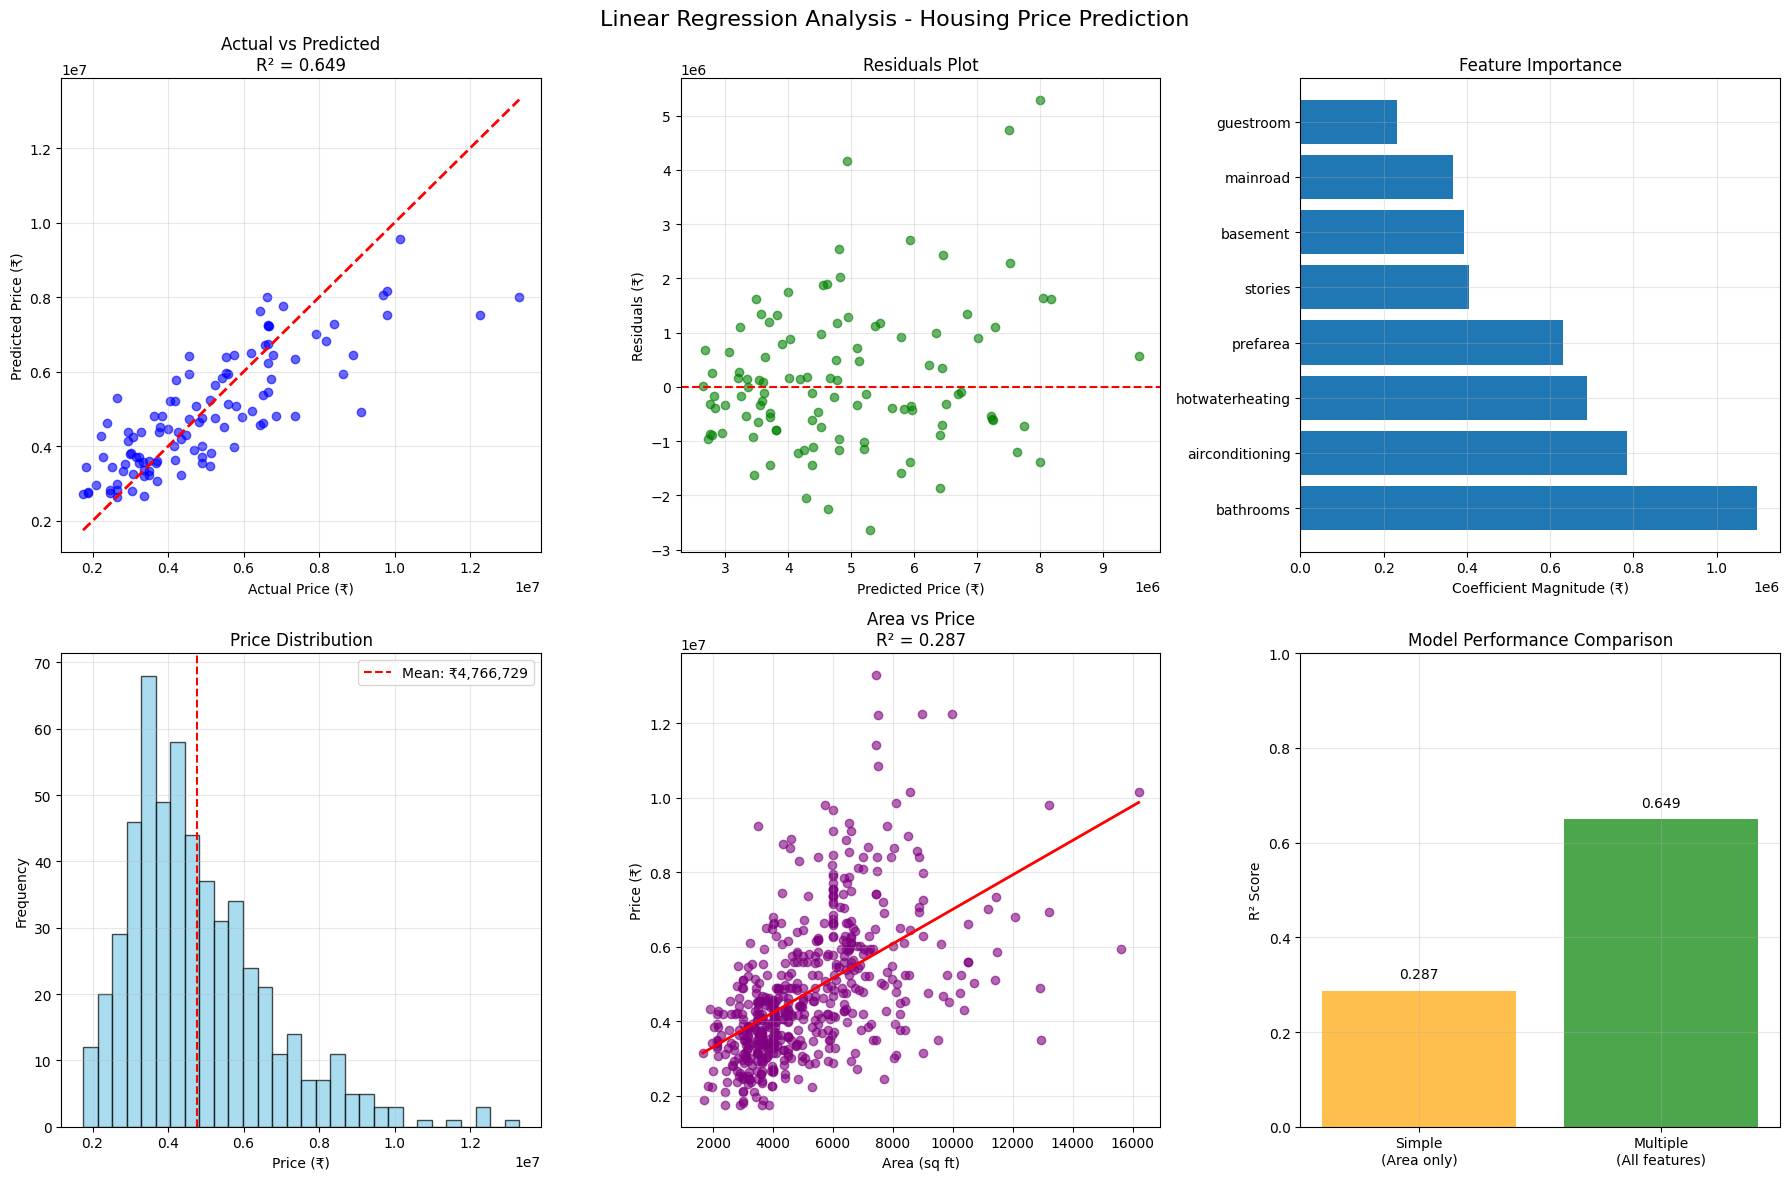

In [34]:
# Call the visualization function
plot_regression_analysis()